In [1]:
# first import the packages you need

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# read in the vcf

snps = pd.read_csv("/home/colette_berg/YNP/NT_fastqs/AHQ_AllPools_filt_chr6.recode.vcf", sep="\t", skiprows=49)

In [3]:
snps

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,/home/colette_berg/YNP/NT_fastqs/RCNT_pool1_upper,/home/colette_berg/YNP/NT_fastqs/RCNT_pool2_lower,/home/colette_berg/YNP/NT_fastqs/RCT_pool1_upper,/home/colette_berg/YNP/NT_fastqs/RCT_pool2_lower,/home/colette_berg/YNP/NT_fastqs/s6,/home/colette_berg/YNP/NT_fastqs/s7
0,Chr_06,9054,.,G,C,34.6331,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:0,0,0:0:0:0,0:0,0:0,0","./.:0,0,0:0:0:0,0:0,0:0,0","./.:0,0,0:0:0:0,0:0,0:0,0","./.:0,0,0:0:0:0,0:0,0:0,0","./.:0,12,146:4:0:2,0:2,0:4,0","./.:66,0,63:5:0:1,0:1,3:2,3"
1,Chr_06,9622,.,A,C,64.0000,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:0,0,0:0:0:0,0:0,0:0,0","./.:0,6,67:2:0:2,0:0,0:2,0","./.:0,3,37:1:0:1,0:0,0:1,0","./.:56,0,53:4:0:2,2:0,0:2,2","./.:0,45,255:15:0:13,0:2,0:15,0","./.:47,0,49:4:0:2,2:0,0:2,2"
2,Chr_06,9690,.,GAAAACCTGAAAACCCGAAAACCCGAAAA,"GAAA,GAAACCCGAAAACCCGAAAA",149.0000,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:0,6,91,6,91,91:2:0:2,0,0:0,0,0:2,0,0","./.:0,18,219,18,219,219:6:0:6,0,0:0,0,0:6,0,0","./.:0,6,103,6,103,103:2:0:2,0,0:0,0,0:2,0,0","./.:54,57,103,0,49,46:2:0:1,0,1:0,0,0:1,0,1","./.:0,81,255,81,255,255:27:0:22,0,0:5,0,0:27,0,0","./.:168,0,22,171,37,200:6:0:0,2,0:1,3,0:1,5,0"
3,Chr_06,9697,.,T,C,72.0000,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:19,0,112:6:0:5,1:0,0:5,1","./.:45,0,123:8:0:6,2:0,0:6,2","./.:28,0,52:3:0:2,1:0,0:2,1","./.:28,0,56:3:0:2,1:0,0:2,1","./.:0,78,255:26:0:22,0:4,0:26,0","./.:0,6,78:2:0:1,0:1,0:2,0"
4,Chr_06,9715,.,AAAACCCGAAACCCGAAACCCGAAACCCGAAACCCGAAAC,AAAACCCGAAACCCGAAACCCGAAACCCGAAACCCGAAACCCGAAAC,447.0000,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:196,0,22:5:0:1,3:0,1:1,4","./.:45,0,161:5:0:2,1:2,0:4,1","./.:0,0,0:0:0:0,0:0,0:0,0","./.:190,0,21:5:0:0,3:1,1:1,4","./.:0,81,255:27:0:18,0:9,0:27,0","./.:60,3,0:1:0:0,1:0,0:0,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487023,Chr_06,22877017,.,G,GTGTTTCT,295.0000,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:0,3,31:1:0:1,0:0,0:1,0","./.:29,0,255:9:3:3,0:4,2:7,2","./.:14,0,255:9:0:3,0:5,1:8,1","0/1:200,0,255:48:16:18,2:16,12:34,14","0/0:0,102,255:34:0:19,0:15,0:34,0","./.:105,0,255:14:5:5,1:4,4:9,5"
487024,Chr_06,22877037,.,CGG,CGGG,45.9838,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:0,0,0:0:0:0,0:0,0:0,0","./.:0,9,78:3:0:0,0:3,0:3,0","./.:69,0,44:5:0:0,0:2,3:2,3","./.:17,0,103:7:0:0,1:6,0:6,1","./.:0,51,255:17:0:7,0:10,0:17,0","./.:0,6,58:2:0:0,0:2,0:2,0"
487025,Chr_06,22877084,.,G,T,335.0000,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:0,0,0:0:0:0,0:0,0:0,0","./.:56,0,56:4:0:0,0:2,2:2,2","./.:67,6,0:2:0:0,0:0,2:0,2","./.:155,0,73:15:0:0,0:4,11:4,11","./.:37,0,249:12:0:2,0:8,2:10,2","./.:61,0,51:4:0:0,0:2,2:2,2"
487026,Chr_06,22877105,.,GTTT,GTTTT,154.0000,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:0,0,0:0:0:0,0:0,0:0,0","./.:69,0,17:4:0:0,0:1,3:1,3","./.:0,0,0:0:0:0,0:0,0:0,0","./.:122,0,46:11:0:0,0:3,8:3,8","./.:0,12,110:4:0:1,0:3,0:4,0","./.:0,3,29:1:0:0,0:1,0:1,0"


In [4]:
# make a dataframe with the columns you want

allele_counts = pd.DataFrame(columns=['chr', 'pos', 'AHQN_ref', 'AHQN_alt', 'AHQT_ref', 'AHQT_alt'])

In [17]:
snps

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,/home/colette_berg/YNP/NT_fastqs/RCNT_pool1_upper,/home/colette_berg/YNP/NT_fastqs/RCNT_pool2_lower,/home/colette_berg/YNP/NT_fastqs/RCT_pool1_upper,/home/colette_berg/YNP/NT_fastqs/RCT_pool2_lower,/home/colette_berg/YNP/NT_fastqs/s6,/home/colette_berg/YNP/NT_fastqs/s7
0,Chr_06,9054,.,G,C,34.6331,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:0,0,0:0:0:0,0:0,0:0,0","./.:0,0,0:0:0:0,0:0,0:0,0","./.:0,0,0:0:0:0,0:0,0:0,0","./.:0,0,0:0:0:0,0:0,0:0,0","./.:0,12,146:4:0:2,0:2,0:4,0","./.:66,0,63:5:0:1,0:1,3:2,3"
1,Chr_06,9622,.,A,C,64.0000,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:0,0,0:0:0:0,0:0,0:0,0","./.:0,6,67:2:0:2,0:0,0:2,0","./.:0,3,37:1:0:1,0:0,0:1,0","./.:56,0,53:4:0:2,2:0,0:2,2","./.:0,45,255:15:0:13,0:2,0:15,0","./.:47,0,49:4:0:2,2:0,0:2,2"
2,Chr_06,9690,.,GAAAACCTGAAAACCCGAAAACCCGAAAA,"GAAA,GAAACCCGAAAACCCGAAAA",149.0000,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:0,6,91,6,91,91:2:0:2,0,0:0,0,0:2,0,0","./.:0,18,219,18,219,219:6:0:6,0,0:0,0,0:6,0,0","./.:0,6,103,6,103,103:2:0:2,0,0:0,0,0:2,0,0","./.:54,57,103,0,49,46:2:0:1,0,1:0,0,0:1,0,1","./.:0,81,255,81,255,255:27:0:22,0,0:5,0,0:27,0,0","./.:168,0,22,171,37,200:6:0:0,2,0:1,3,0:1,5,0"
3,Chr_06,9697,.,T,C,72.0000,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:19,0,112:6:0:5,1:0,0:5,1","./.:45,0,123:8:0:6,2:0,0:6,2","./.:28,0,52:3:0:2,1:0,0:2,1","./.:28,0,56:3:0:2,1:0,0:2,1","./.:0,78,255:26:0:22,0:4,0:26,0","./.:0,6,78:2:0:1,0:1,0:2,0"
4,Chr_06,9715,.,AAAACCCGAAACCCGAAACCCGAAACCCGAAACCCGAAAC,AAAACCCGAAACCCGAAACCCGAAACCCGAAACCCGAAACCCGAAAC,447.0000,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:196,0,22:5:0:1,3:0,1:1,4","./.:45,0,161:5:0:2,1:2,0:4,1","./.:0,0,0:0:0:0,0:0,0:0,0","./.:190,0,21:5:0:0,3:1,1:1,4","./.:0,81,255:27:0:18,0:9,0:27,0","./.:60,3,0:1:0:0,1:0,0:0,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487023,Chr_06,22877017,.,G,GTGTTTCT,295.0000,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:0,3,31:1:0:1,0:0,0:1,0","./.:29,0,255:9:3:3,0:4,2:7,2","./.:14,0,255:9:0:3,0:5,1:8,1","0/1:200,0,255:48:16:18,2:16,12:34,14","0/0:0,102,255:34:0:19,0:15,0:34,0","./.:105,0,255:14:5:5,1:4,4:9,5"
487024,Chr_06,22877037,.,CGG,CGGG,45.9838,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:0,0,0:0:0:0,0:0,0:0,0","./.:0,9,78:3:0:0,0:3,0:3,0","./.:69,0,44:5:0:0,0:2,3:2,3","./.:17,0,103:7:0:0,1:6,0:6,1","./.:0,51,255:17:0:7,0:10,0:17,0","./.:0,6,58:2:0:0,0:2,0:2,0"
487025,Chr_06,22877084,.,G,T,335.0000,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:0,0,0:0:0:0,0:0,0:0,0","./.:56,0,56:4:0:0,0:2,2:2,2","./.:67,6,0:2:0:0,0:0,2:0,2","./.:155,0,73:15:0:0,0:4,11:4,11","./.:37,0,249:12:0:2,0:8,2:10,2","./.:61,0,51:4:0:0,0:2,2:2,2"
487026,Chr_06,22877105,.,GTTT,GTTTT,154.0000,.,.,GT:PL:DP:SP:ADF:ADR:AD,"./.:0,0,0:0:0:0,0:0,0:0,0","./.:69,0,17:4:0:0,0:1,3:1,3","./.:0,0,0:0:0:0,0:0,0:0,0","./.:122,0,46:11:0:0,0:3,8:3,8","./.:0,12,110:4:0:1,0:3,0:4,0","./.:0,3,29:1:0:0,0:1,0:1,0"


In [18]:
# the vcf format that we imported has a lot of information. the info we're interested in is the "AD" or allele depth column
# these lines pull out "AD"

allele_counts['pos'] = snps['POS']
allele_counts['chr'] = snps['#CHROM']
allele_counts['AHQT_ref'] = snps['/home/colette_berg/YNP/NT_fastqs/s6'].str.split(":", expand=True)[6].str.split(",", expand=True)[0]
allele_counts['AHQT_alt'] = snps['/home/colette_berg/YNP/NT_fastqs/s6'].str.split(":", expand=True)[6].str.split(",", expand=True)[1]

allele_counts['AHQN_ref'] = snps['/home/colette_berg/YNP/NT_fastqs/s7'].str.split(":", expand=True)[6].str.split(",", expand=True)[0]
allele_counts['AHQN_alt'] = snps['/home/colette_berg/YNP/NT_fastqs/s7'].str.split(":", expand=True)[6].str.split(",", expand=True)[1]

allele_counts['RCT_upper_ref'] = snps['/home/colette_berg/YNP/NT_fastqs/RCT_pool1_upper'].str.split(":", expand=True)[6].str.split(",", expand=True)[0]
allele_counts['RCT_upper_alt'] = snps['/home/colette_berg/YNP/NT_fastqs/RCT_pool1_upper'].str.split(":", expand=True)[6].str.split(",", expand=True)[1]


allele_counts['RCT_lower_ref'] = snps['/home/colette_berg/YNP/NT_fastqs/RCT_pool2_lower'].str.split(":", expand=True)[6].str.split(",", expand=True)[0]
allele_counts['RCT_lower_alt'] = snps['/home/colette_berg/YNP/NT_fastqs/RCT_pool2_lower'].str.split(":", expand=True)[6].str.split(",", expand=True)[1]


allele_counts['RCN_upper_ref'] = snps['/home/colette_berg/YNP/NT_fastqs/RCNT_pool1_upper'].str.split(":", expand=True)[6].str.split(",", expand=True)[0]
allele_counts['RCN_upper_alt'] = snps['/home/colette_berg/YNP/NT_fastqs/RCNT_pool1_upper'].str.split(":", expand=True)[6].str.split(",", expand=True)[1]


allele_counts['RCN_lower_ref'] = snps['/home/colette_berg/YNP/NT_fastqs/RCNT_pool2_lower'].str.split(":", expand=True)[6].str.split(",", expand=True)[0]
allele_counts['RCN_lower_alt'] = snps['/home/colette_berg/YNP/NT_fastqs/RCNT_pool2_lower'].str.split(":", expand=True)[6].str.split(",", expand=True)[1]


In [20]:
# add up the read counts to get the total (we want to calculate p and q next)

allele_counts['AHQT_sum'] = np.sum([allele_counts['AHQT_ref'], allele_counts['AHQT_alt']], dtype=int, axis=0)
allele_counts['AHQN_sum'] = np.sum([allele_counts['AHQN_ref'], allele_counts['AHQN_alt']], dtype=int, axis=0)
allele_counts['RCT_upper_sum'] = np.sum([allele_counts['RCT_upper_ref'], allele_counts['RCT_upper_alt']], dtype=int, axis=0)
allele_counts['RCT_lower_sum'] = np.sum([allele_counts['RCT_lower_ref'], allele_counts['RCT_lower_alt']], dtype=int, axis=0)
allele_counts['RCN_upper_sum'] = np.sum([allele_counts['RCN_upper_ref'], allele_counts['RCN_upper_alt']], dtype=int, axis=0)
allele_counts['RCN_lower_sum'] = np.sum([allele_counts['RCN_lower_ref'], allele_counts['RCN_lower_alt']], dtype=int, axis=0)

In [28]:
# filter by a partcular depth (this can be changed)

filt = allele_counts[allele_counts["AHQT_sum"] >50]
filt = filt[filt["AHQN_sum"] > 50]
filt = filt[filt["RCN_lower_sum"] > 50]
filt = filt[filt["RCN_upper_sum"] > 50]
filt = filt[filt["RCT_upper_sum"] > 50]
filt = filt[filt["RCT_lower_sum"] > 50]

allele_counts=filt

In [29]:
# calculate p and q

allele_counts['AHQT_p'] = np.divide(allele_counts['AHQT_ref'].astype('float'), allele_counts['AHQT_sum'].astype('float'))
allele_counts['AHQT_q'] = np.divide(allele_counts['AHQT_alt'].astype('float'), allele_counts['AHQT_sum'].astype('float'))

allele_counts['AHQN_p'] = np.divide(allele_counts['AHQN_ref'].astype('float'), allele_counts['AHQN_sum'].astype('float'))
allele_counts['AHQN_q'] = np.divide(allele_counts['AHQN_alt'].astype('float'), allele_counts['AHQN_sum'].astype('float'))


allele_counts['RCT_lower_p'] = np.divide(allele_counts['RCT_lower_ref'].astype('float'), allele_counts['RCT_lower_sum'].astype('float'))
allele_counts['RCT_lower_q'] = np.divide(allele_counts['RCT_lower_alt'].astype('float'), allele_counts['RCT_lower_sum'].astype('float'))


allele_counts['RCT_upper_p'] = np.divide(allele_counts['RCT_upper_ref'].astype('float'), allele_counts['RCT_upper_sum'].astype('float'))
allele_counts['RCT_upper_q'] = np.divide(allele_counts['RCT_upper_alt'].astype('float'), allele_counts['RCT_upper_sum'].astype('float'))


allele_counts['RCN_lower_p'] = np.divide(allele_counts['RCN_lower_ref'].astype('float'), allele_counts['RCN_lower_sum'].astype('float'))
allele_counts['RCN_lower_q'] = np.divide(allele_counts['RCN_lower_alt'].astype('float'), allele_counts['RCN_lower_sum'].astype('float'))


allele_counts['RCN_upper_p'] = np.divide(allele_counts['RCN_upper_ref'].astype('float'), allele_counts['RCN_upper_sum'].astype('float'))
allele_counts['RCN_upper_q'] = np.divide(allele_counts['RCN_upper_alt'].astype('float'), allele_counts['RCN_upper_sum'].astype('float'))


In [30]:
# write a csv of just the end of chromosome 6

allele_counts[allele_counts['pos']>19000000].to_csv("allPools_chr06_end.csv", sep="\t")

In [17]:
allele_counts['p_diff'] = np.subtract(allele_counts['AHQT_p'], allele_counts['AHQN_p'])
allele_counts['q_diff'] = np.subtract(allele_counts['AHQT_q'], allele_counts['AHQN_q'])



/tmp/ipykernel_2957575/2018991313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allele_counts['p_diff'] = np.subtract(allele_counts['AHQT_p'], allele_counts['AHQN_p'])
/tmp/ipykernel_2957575/2018991313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allele_counts['q_diff'] = np.subtract(allele_counts['AHQT_q'], allele_counts['AHQN_q'])


In [29]:
allele_counts['AHQN_T_freq_diff'] = np.subtract(allele_counts['AHQT_p'], allele_counts['AHQN_p'])

/tmp/ipykernel_2947942/441691010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allele_counts['AHQN_T_freq_diff'] = np.subtract(allele_counts['AHQT_p'], allele_counts['AHQN_p'])


In [10]:
#allele_counts_narrow = allele_counts[allele_counts['pos']<19319304]
#allele_counts_narrow = allele_counts_narrow[allele_counts_narrow['pos']>18860748]

In [38]:
#allele_counts_narrow = allele_counts[allele_counts['pos']<19319304]
allele_counts_narrow = allele_counts[allele_counts['pos']>18860748]

#allele_counts['AHQN_T_freq_diff']

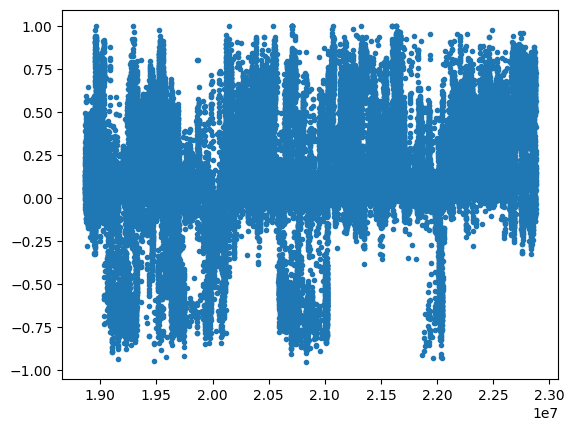

In [39]:
plt.plot(allele_counts_narrow['pos'], allele_counts_narrow['AHQN_T_freq_diff'], '.')

In [17]:
allele_counts_filt = allele_counts[allele_counts['pos'] > 22650000]
allele_counts_filt = allele_counts_filt[allele_counts_filt['pos'] < 22654000]

In [18]:
allele_counts_filt.to_csv("NT_pool.csv",  sep="\t")